# About
Image Segmentation using Clustering Techniques i.e Hard and Soft Clustering.


Hard clustering algorithm - K-means

Soft clustering algorithm - Gaussian Mixture Models(GMMs)

 Dataset used Brain MRI Segmentation dataset. [Kaggle Link](https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation/code)

In [69]:
#importing modules
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from itertools import chain
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import glob
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize 
from skimage import io
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import mixture
import tqdm

In [2]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Dataset/BrainMRI')

In [3]:
!ls

archive.zip  kaggle_3m	lgg-mri-segmentation


In [4]:
#viewing the contents inside the folder
!ls lgg-mri-segmentation/kaggle_3m

data.csv	       TCGA_DU_7018_19911220  TCGA_FG_A4MU_20030903
README.md	       TCGA_DU_7019_19940908  TCGA_FG_A60K_20040224
TCGA_CS_4941_19960909  TCGA_DU_7294_19890104  TCGA_HT_7473_19970826
TCGA_CS_4942_19970222  TCGA_DU_7298_19910324  TCGA_HT_7475_19970918
TCGA_CS_4943_20000902  TCGA_DU_7299_19910417  TCGA_HT_7602_19951103
TCGA_CS_4944_20010208  TCGA_DU_7300_19910814  TCGA_HT_7605_19950916
TCGA_CS_5393_19990606  TCGA_DU_7301_19911112  TCGA_HT_7608_19940304
TCGA_CS_5395_19981004  TCGA_DU_7302_19911203  TCGA_HT_7616_19940813
TCGA_CS_5396_20010302  TCGA_DU_7304_19930325  TCGA_HT_7680_19970202
TCGA_CS_5397_20010315  TCGA_DU_7306_19930512  TCGA_HT_7684_19950816
TCGA_CS_6186_20000601  TCGA_DU_7309_19960831  TCGA_HT_7686_19950629
TCGA_CS_6188_20010812  TCGA_DU_8162_19961029  TCGA_HT_7690_19960312
TCGA_CS_6290_20000917  TCGA_DU_8163_19961119  TCGA_HT_7692_19960724
TCGA_CS_6665_20010817  TCGA_DU_8164_19970111  TCGA_HT_7693_19950520
TCGA_CS_6666_20011109  TCGA_DU_8165_19970205  TCGA_HT_7694_19

In [5]:
directory_path = 'kaggle_3m/'

In [6]:
dataset = pd.read_csv('kaggle_3m/data.csv')

In [7]:
dataset.info

<bound method DataFrame.info of           Patient  RNASeqCluster  MethylationCluster  ...  race  ethnicity  death01
0    TCGA_CS_4941            2.0                 4.0  ...   3.0        2.0      1.0
1    TCGA_CS_4942            1.0                 5.0  ...   2.0        NaN      1.0
2    TCGA_CS_4943            1.0                 5.0  ...   3.0        NaN      0.0
3    TCGA_CS_4944            NaN                 5.0  ...   3.0        NaN      0.0
4    TCGA_CS_5393            4.0                 5.0  ...   3.0        NaN      0.0
..            ...            ...                 ...  ...   ...        ...      ...
105  TCGA_HT_8563            2.0                 5.0  ...   3.0        2.0      0.0
106  TCGA_HT_A5RC            2.0                 4.0  ...   3.0        2.0      1.0
107  TCGA_HT_A616            NaN                 5.0  ...   3.0        2.0      0.0
108  TCGA_HT_A61A            NaN                 5.0  ...   3.0        2.0      0.0
109  TCGA_HT_A61B            NaN            

In [8]:
dataset.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [9]:
#creating list for storing the path of raw mri images and their corresponding binary masks
image_mask_path = []
for path in glob.glob("lgg-mri-segmentation/kaggle_3m/*"):
    try:
        dir_name = path.split('/')[-1]
        for filename in os.listdir(path):
            image_path = path + '/' + filename
            image_mask_path.extend([dir_name, image_path])
    except Exception as e:
        print(e)


[Errno 20] Not a directory: 'lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: 'lgg-mri-segmentation/kaggle_3m/data.csv'


In [10]:
image_mask_path

['TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_21.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15_mask.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_9.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_6_mask.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_7.tif',
 'TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_C

In [11]:
#checking one such pair
image_mask_path[0:2]

['TCGA_CS_4941_19960909',
 'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif']

In [13]:
#creating a dataframe
df = pd.DataFrame({"patient_id": image_mask_path[::2], "path": image_mask_path[1::2]})
df.head()

,patient_id,path
0,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
2,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
3,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
4,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...


# Observation
The above dataframe contains jumbled pair of data.

lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_23.tif

lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_23_mask.tif
are the image and mask pairs.

So, we have to clean the dataset and sort them.
Referring one of the kaggle kernels. [Link](https://www.kaggle.com/ikramiaich7/unet-brain)


In [14]:
df_imgs = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]

# File path line length images for later sorting
BASE_LEN = 75 # len(lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif)
END_IMG_LEN = 4 # len(lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif)
END_MASK_LEN = 9 # (lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif)

In [15]:
df_imgs.head()

,patient_id,path
1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
2,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
4,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
7,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
8,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...


In [16]:
df_masks.head()

,patient_id,path
0,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
3,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
5,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
6,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
9,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...


In [17]:
#sorting the columns with right pairs of images and mask serially!
#masks = sorted(df_masks["path"].values, key= lambda x: int(x[BASE_LEN:-END_IMG_LEN]))
df_masks["path"][0]

'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif'

In [18]:
imgs = sorted(df_imgs["path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["path"].values, key=lambda x : int(x[BASE_LEN:-END_MASK_LEN]))

In [19]:
#checking the sorted pari
print("Path to image", imgs[12])
print("Path to the mask", masks[12])

Path to image lgg-mri-segmentation/kaggle_3m/TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif
Path to the mask lgg-mri-segmentation/kaggle_3m/TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_mask.tif


In [20]:
#creating the final dataframe with patient id, image_path and mask_path
brain_df = pd.DataFrame({"patient_id": df_imgs.patient_id.values, "image_path":imgs, "mask_path": masks})



In [21]:
len(brain_df)

3929

In [22]:
#appending the number of max_values in the mask:
#0 for binary and 1 for more than 2
def pos_neg_diagnosis(mask_path):
  value = np.max(cv2.imread(mask_path))
  print("processed")
  if value>0:
    return 1
  else:
    return 0

brain_df['mask'] = brain_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))

processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed
processed


In [23]:
brain_df.head()

,patient_id,image_path,mask_path,mask
0,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...,0
1,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19...,0
2,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20...,0
3,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20...,0
4,TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19...,0


In [52]:
#counting number of mask which contain tumors and number of mask which doesn't
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

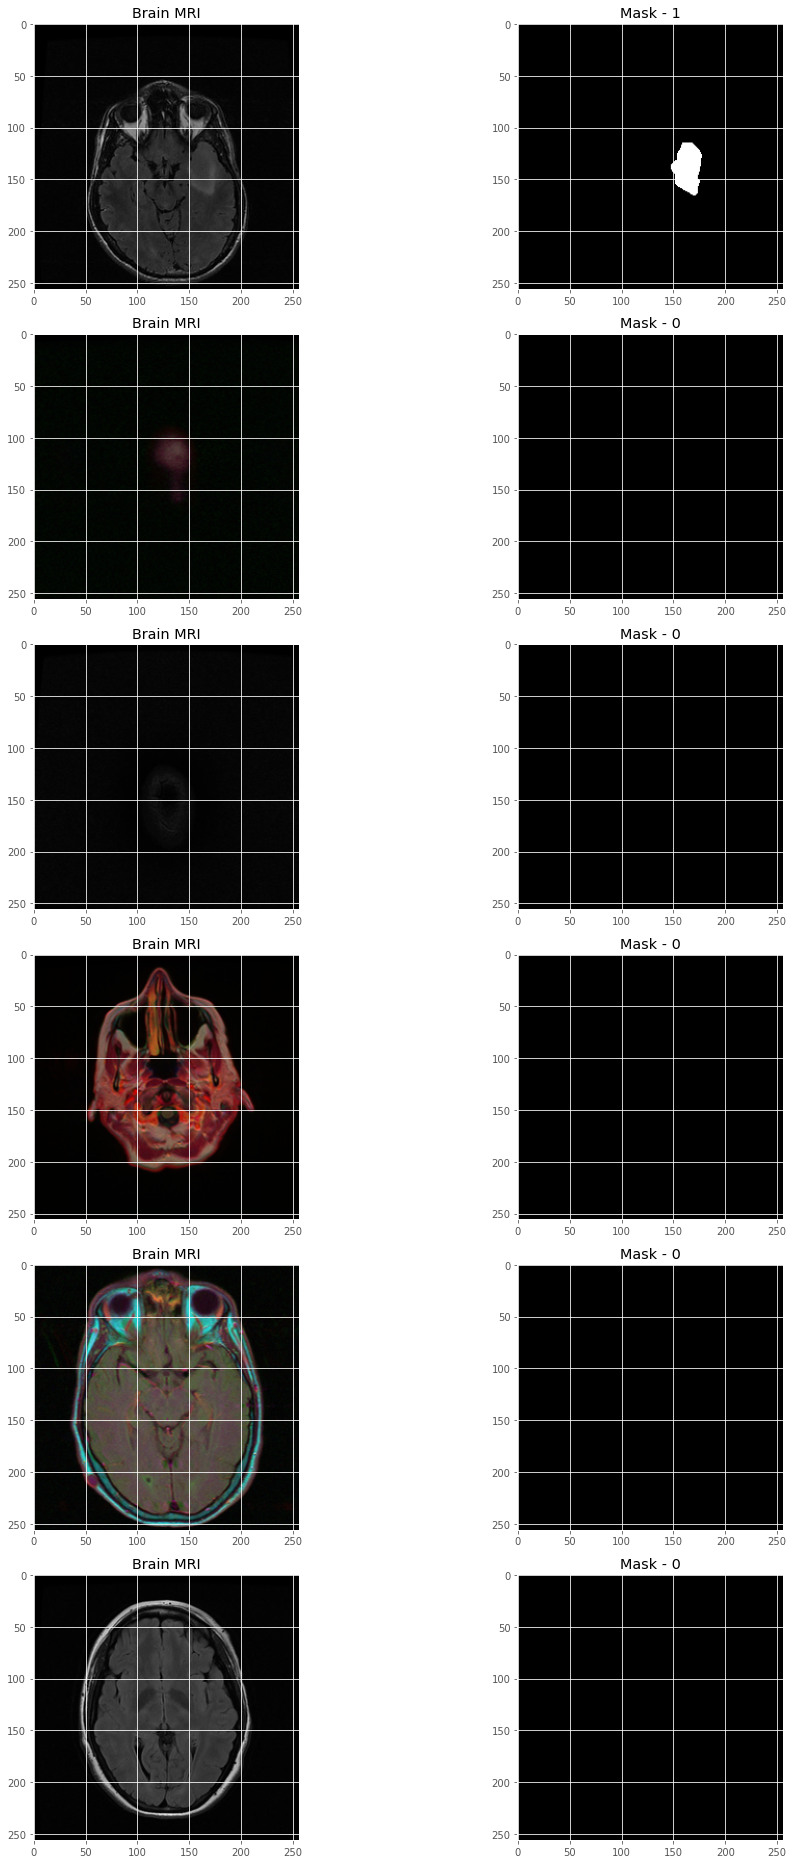

In [32]:
fig, axs = plt.subplots(6,2, figsize=(16,26))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI 
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

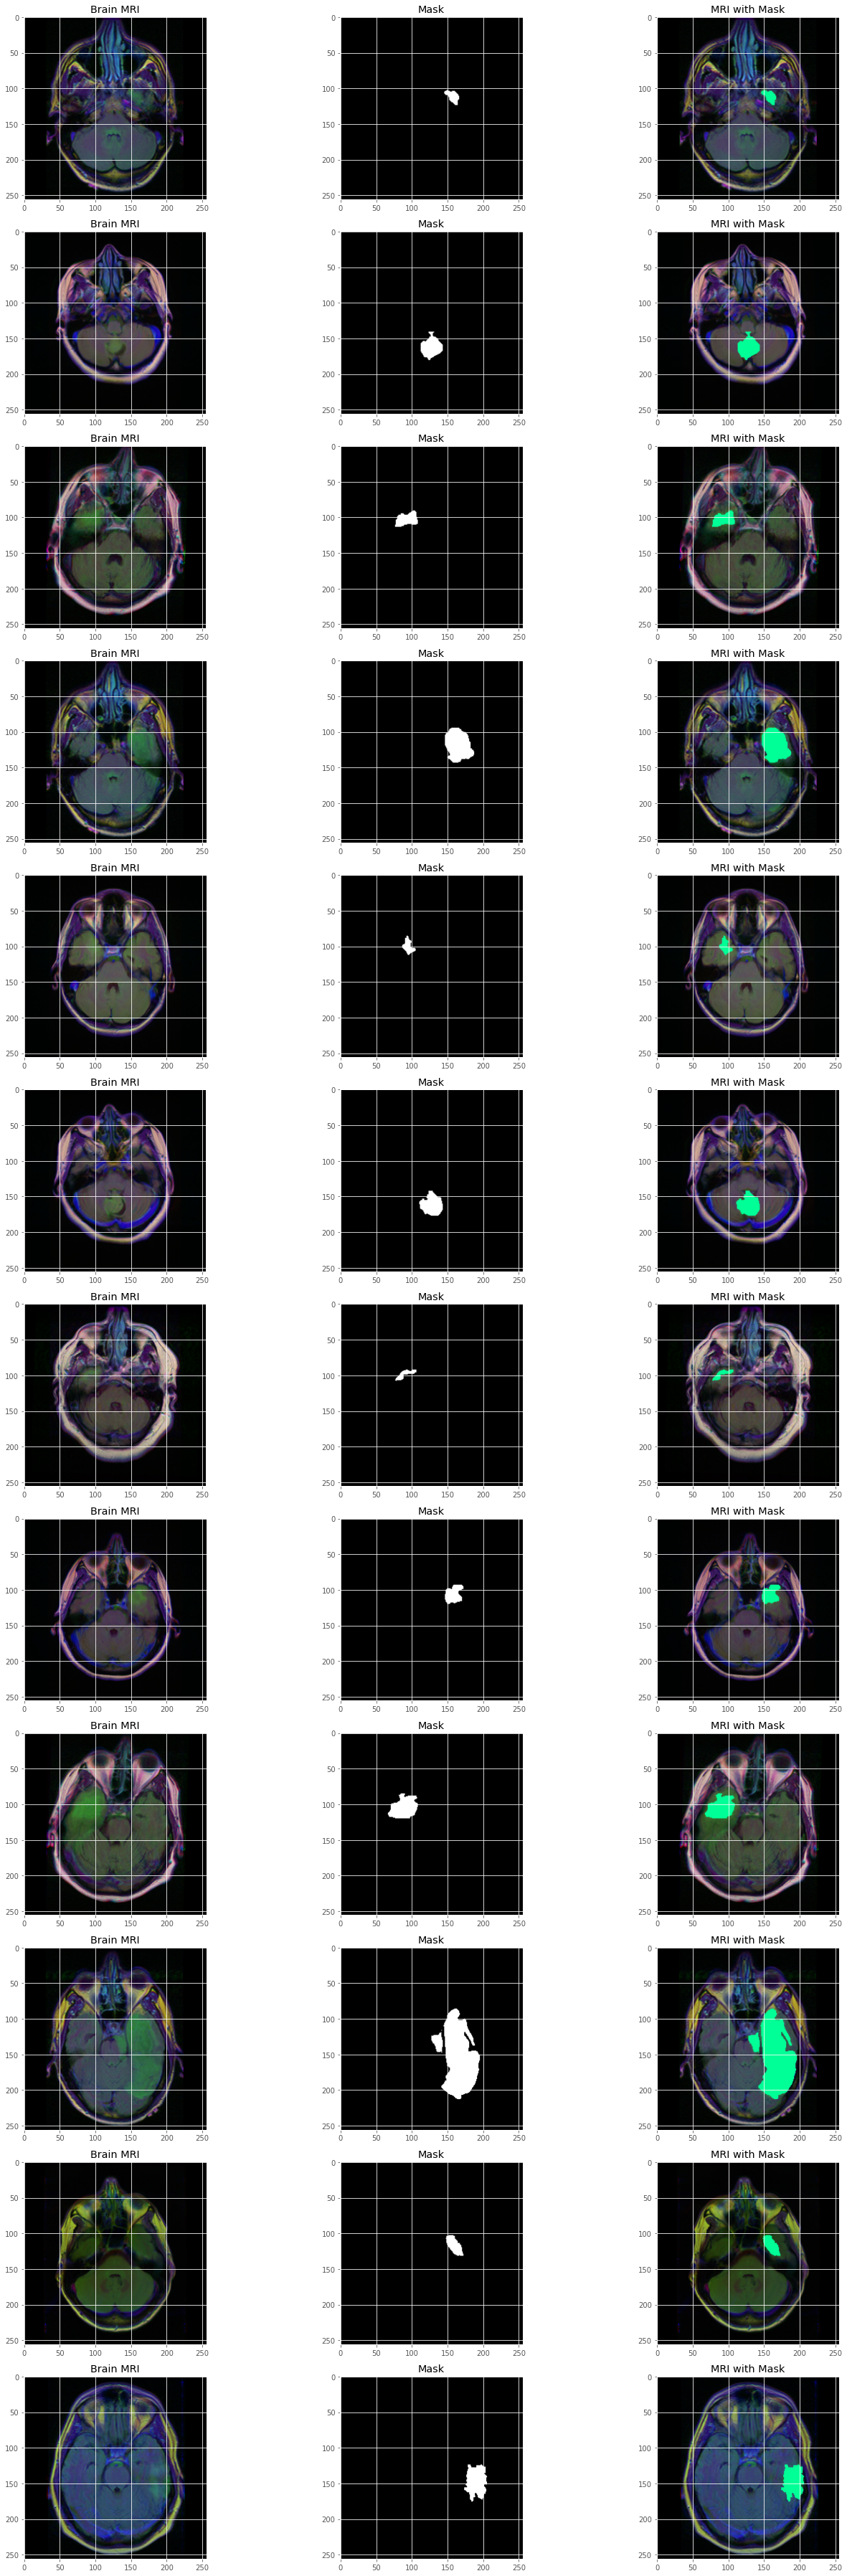

In [36]:
#visualising predictions by overlaying
count = 0
i = 0
fig,axs = plt.subplots(12,3, figsize=(20,50))
for mask in brain_df['mask']:
    if (mask==1):
        img = io.imread(brain_df.image_path[i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)
        
        mask = io.imread(brain_df.mask_path[i])
        axs[count][1].title.set_text("Mask")
        axs[count][1].imshow(mask, cmap='gray')
        
        img[mask==255] = (0,255,150)  # change pixel color at the position of mask
        axs[count][2].title.set_text("MRI with Mask")
        axs[count][2].imshow(img)
        count +=1
    i += 1
    if (count==12):
        break
        
fig.tight_layout()

In [60]:
#dropping the unneccessary column i.e patient id and mask 
brain_df_modified = brain_df.drop(columns=['patient_id','mask'])
#ideally you can split the dataset such that number of mask and non-mask entries are equal

In [64]:
brain_df_modified.head(10)

,image_path,mask_path
0,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19...
1,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19...
2,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20...
3,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20...
4,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19...
5,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19...
6,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5396_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5396_20...
7,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5397_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_5397_20...
8,lgg-mri-segmentation/kaggle_3m/TCGA_CS_6186_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_6186_20...
9,lgg-mri-segmentation/kaggle_3m/TCGA_CS_6188_20...,lgg-mri-segmentation/kaggle_3m/TCGA_CS_6188_20...


In [75]:
#now, creating feature vectors for train and test
images = []
masks = []
for idx in tqdm.trange((len(brain_df_modified))):
  images.append(cv2.imread(brain_df_modified['image_path'][idx]).flatten())
  masks.append(cv2.imread(brain_df_modified['mask_path'][idx]).flatten())

#printing the shape of images and masks
print(np.shape(images))
print(np.shape(masks)) 

100%|██████████| 3929/3929 [00:29<00:00, 135.15it/s]


(3929, 196608)
(3929, 196608)


In [ ]:
#since it is a binary 
cluster = KMeans(n_clusters=2)
labels = cluster.fit_predict(images)

In [ ]:
cluster.